In [4]:
import sys
sys.path.append("/home/hugo/projetos-doutorado/mimo_emb_fts/src/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from embfts.models.MimoNonStationaryFtsPca import MimoNonStationaryFtsPca
from pyFTS.models.nonstationary import nsfts
from pyFTS.benchmarks import Measures
from pyFTS.benchmarks import Measures
import matplotlib.pyplot as plt
from pyFTS.common import Util
import datetime
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math
from embfts.util.DataSetUtil import DataSetUtil


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
data_set_util = DataSetUtil()

In [6]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/AirQualityUCI.csv', sep=';', decimal=',')
data = df.drop(labels=['Date','Time','Unnamed: 15', 'Unnamed: 16'], axis=1)
data.dropna(inplace=True)
#data = clean_dataset(data)
data.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [7]:
data.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [8]:
# frame as supervised learning
reframed = data_set_util.series_to_supervised_mimo(data, 1, 1)
reframed.head()

CO(GT)(t-1)  PT08.S1(CO)(t-1)  NMHC(GT)(t-1)  C6H6(GT)(t-1)  \
1          2.6            1360.0          150.0           11.9   
2          2.0            1292.0          112.0            9.4   
3          2.2            1402.0           88.0            9.0   
4          2.2            1376.0           80.0            9.2   
5          1.6            1272.0           51.0            6.5   

   PT08.S2(NMHC)(t-1)  NOx(GT)(t-1)  PT08.S3(NOx)(t-1)  NO2(GT)(t-1)  \
1              1046.0         166.0             1056.0         113.0   
2               955.0         103.0             1174.0          92.0   
3               939.0         131.0             1140.0         114.0   
4               948.0         172.0             1092.0         122.0   
5               836.0         131.0             1205.0         116.0   

   PT08.S4(NO2)(t-1)  PT08.S5(O3)(t-1)  ...  C6H6(GT)(t)  PT08.S2(NMHC)(t)  \
1             1692.0            1268.0  ...          9.4             955.0   
2             1559.0             972.0  ...          9.0             939.0   
3             1555.0            1074.0  ...          9.2             948.0   
4             1584.0            1203.0  ...          6.5             836.0   
5             1490.0            1110.0  ...          4.7             750.0   

   NOx(GT)(t)  PT08.S3(NOx)(t)  NO2(GT)(t)  PT08.S4(NO2)(t)  PT08.S5(O3)(t)  \
1       103.0           1174.0        92.0           1559.0           972.0   
2       131.0           1140.0       114.0           1555.0          1074.0   
3       172.0           1092.0       122.0           1584.0          1203.0   
4       131.0           1205.0       116.0           1490.0          1110.0   
5        89.0           1337.0        96.0           1393.0           949.0   

   T(t)  RH(t)   AH(t)  
1  13.3   47.7  0.7255  
2  11.9   54.0  0.7502  
3  11.0   60.0  0.7867  
4  11.2   59.6  0.7888  
5  11.2   59.2  0.7848  

[5 rows x 26 columns]

In [9]:
cols = reframed.columns
cols

Index(['CO(GT)(t-1)', 'PT08.S1(CO)(t-1)', 'NMHC(GT)(t-1)', 'C6H6(GT)(t-1)',
       'PT08.S2(NMHC)(t-1)', 'NOx(GT)(t-1)', 'PT08.S3(NOx)(t-1)',
       'NO2(GT)(t-1)', 'PT08.S4(NO2)(t-1)', 'PT08.S5(O3)(t-1)', 'T(t-1)',
       'RH(t-1)', 'AH(t-1)', 'CO(GT)(t)', 'PT08.S1(CO)(t)', 'NMHC(GT)(t)',
       'C6H6(GT)(t)', 'PT08.S2(NMHC)(t)', 'NOx(GT)(t)', 'PT08.S3(NOx)(t)',
       'NO2(GT)(t)', 'PT08.S4(NO2)(t)', 'PT08.S5(O3)(t)', 'T(t)', 'RH(t)',
       'AH(t)'],
      dtype='object')

In [10]:
df_forecats_columns = ['CO(GT)(t)', 'PT08.S1(CO)(t)', 'NMHC(GT)(t)',
       'C6H6(GT)(t)', 'PT08.S2(NMHC)(t)', 'NOx(GT)(t)', 'PT08.S3(NOx)(t)',
       'NO2(GT)(t)', 'PT08.S4(NO2)(t)', 'PT08.S5(O3)(t)', 'T(t)', 'RH(t)',
       'AH(t)']

In [11]:
def sliding_window_pca(data,n_windows,train_size,steps_ahead,transformation):

    result = {
         "window": [],
         "rmse": [],
         "mape": [],
         "mae": [],
         "r2": [],
         "variable":[]
    }
    
    final_result = {
         "window": [],
         "rmse": [],
         "mape": [],
         "mae": [],
         "r2": [],
         "variable":[]
    }

    tam = len(data)
    n_windows = 30
    windows_length = math.floor(tam / n_windows)
    for ct, ttrain, ttest in Util.sliding_window(data, windows_length, train_size, inc=1):
        if len(ttest) > 0:
            
            print('-' * 20)
            print(f'training window {(ct)}')
            
            df_train = ttrain.loc[:,'CO(GT)(t-1)':'AH(t-1)']
            df_test = ttest.loc[:,'CO(GT)(t-1)':'AH(t-1)']
            df_original = ttest.loc[:,'CO(GT)(t)':'AH(t)']
            
            models, data_train = mimo_kpca_nsfts.run_train(df_train,transformation)
            forecast, data_test = mimo_kpca_nsfts.run_test(models,df_test,steps_ahead,transformation)
            
            columns = list(df_forecats_columns)
            df_forecast = pd.DataFrame(forecast,columns=columns)
            
            for col in columns:  
                original = df_original[col].values
                forecast = df_forecast[col].values
#                 original = original[:len(original)-1]
#                 forecast = forecast[1:]
                
                #print("[{0: %H:%M:%S}]".format(datetime.datetime.now()) + f" getting statistics for variable: " + col)
                mae = mean_absolute_error(original,forecast)
                r2 = r2_score(original,forecast)
                #rmse = mean_squared_error(original,forecast,squared=False)
                rmse = Measures.rmse(original,forecast)
                mape = Measures.mape(original,forecast)
                
                #nrmse = cal_nrmse(rmse, original)

                result["rmse"].append(rmse)
                #result["nrmse"].append(nrmse)
                result["mape"].append(mape)
                result["mae"].append(mae)
                result["r2"].append(r2)
                result["window"].append(ct)
                result["variable"].append(col)
                
                fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
                ax.plot(original, label='Original')
                ax.plot(forecast, label='Forecast')
                handles, labels = ax.get_legend_handles_labels()
                lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
                plt.show()
        
    measures = pd.DataFrame(result)
    return measures

## Sliding Window: MIMO KPCA-NSFTS

In [12]:
num_components_pca = 8
order_fts_model = 1
npart = 50
gamma = 0.1
fts_model = nsfts.NonStationaryFTS
memory_window_error = 24
steps_ahead = 1

mimo_kpca_nsfts = MimoNonStationaryFtsPca(num_components_pca, order_fts_model, npart,
                                            gamma, fts_model, memory_window_error)

--------------------
training window 0


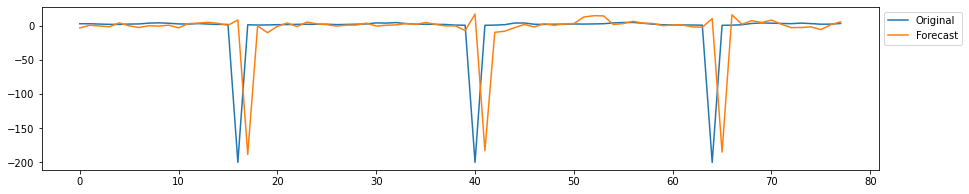

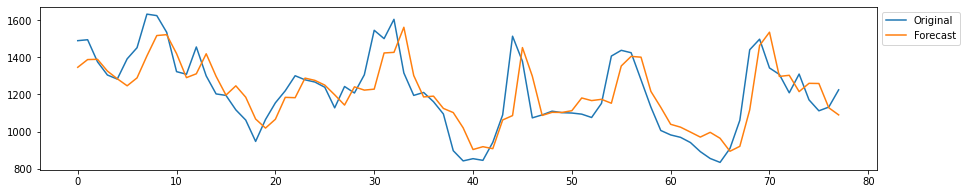

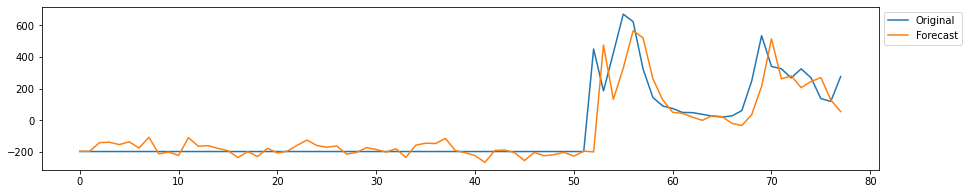

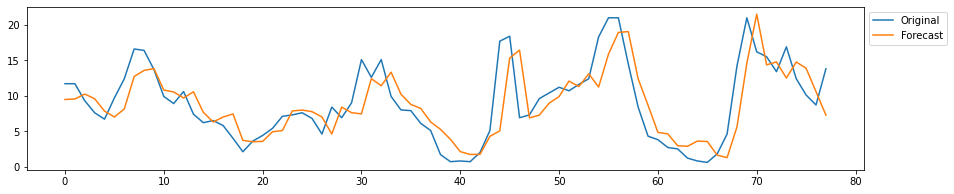

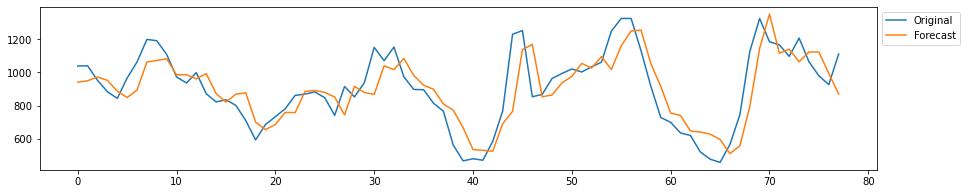

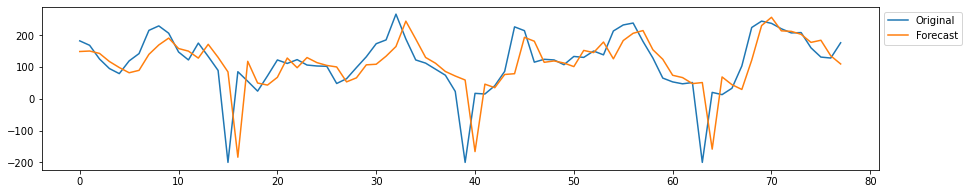

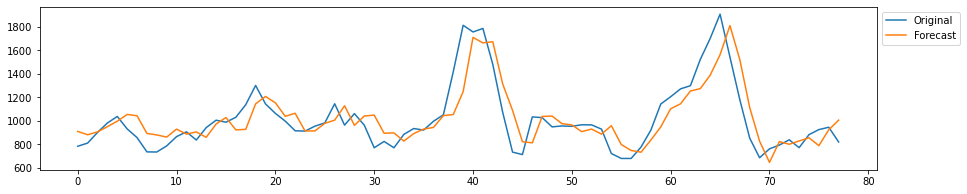

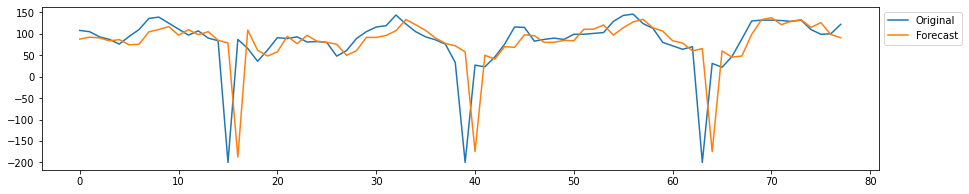

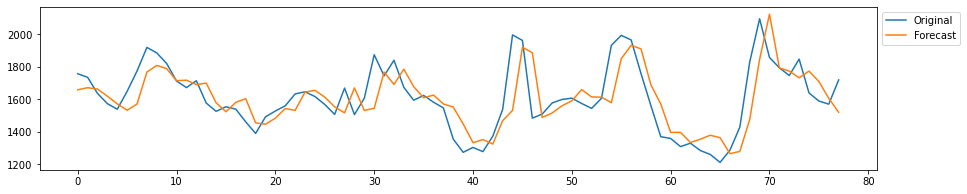

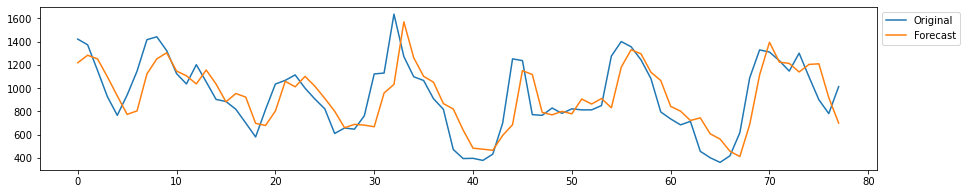

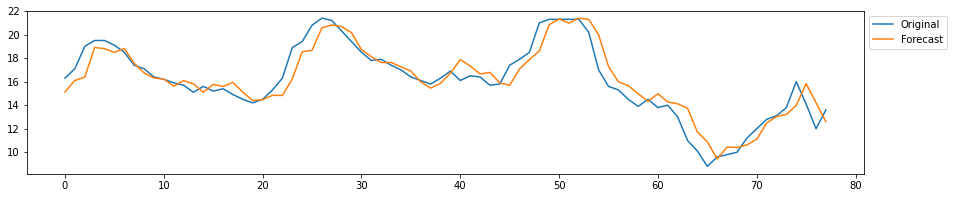

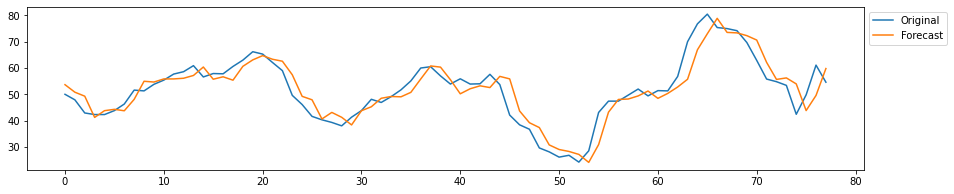

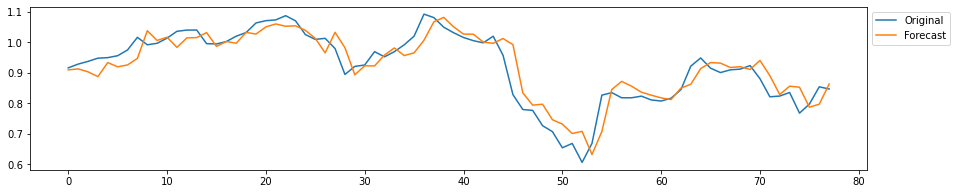

--------------------
training window 311


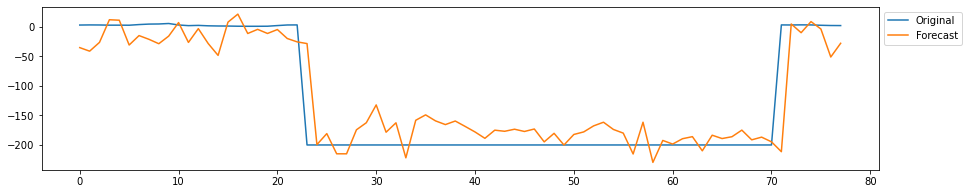

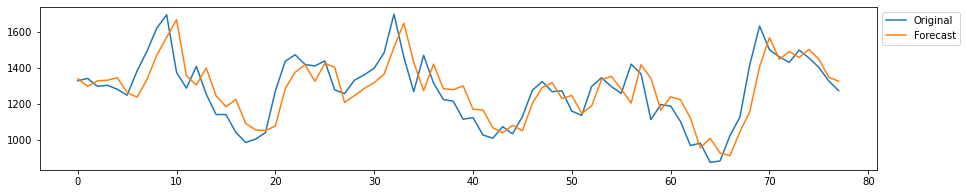

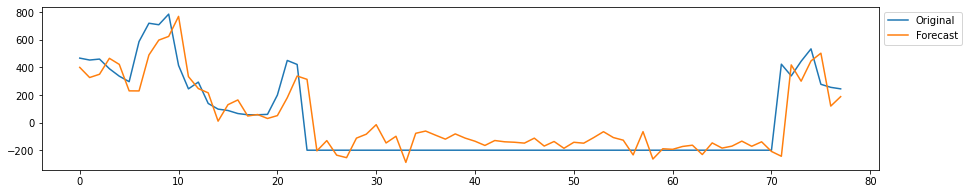

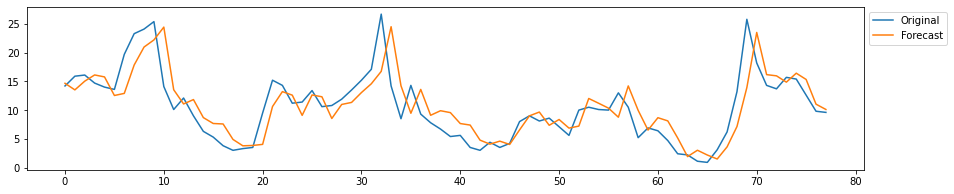

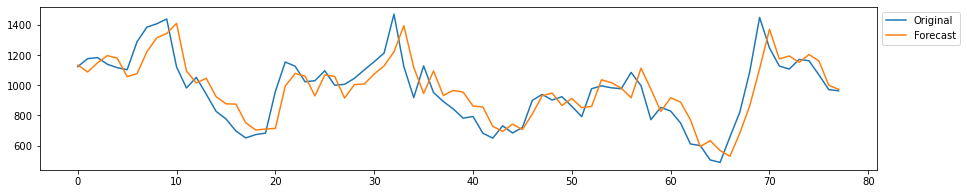

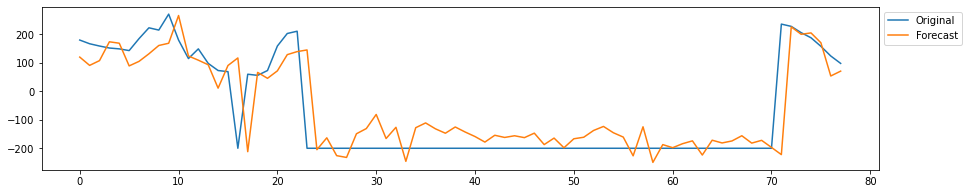

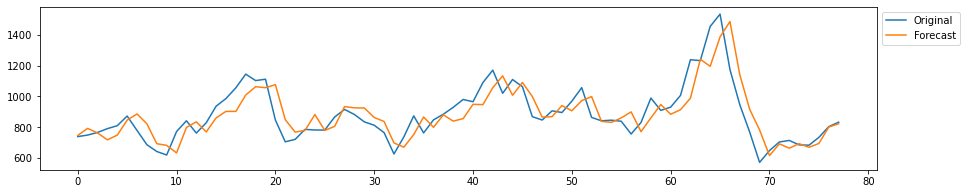

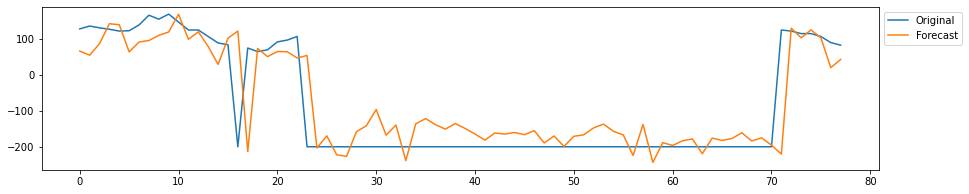

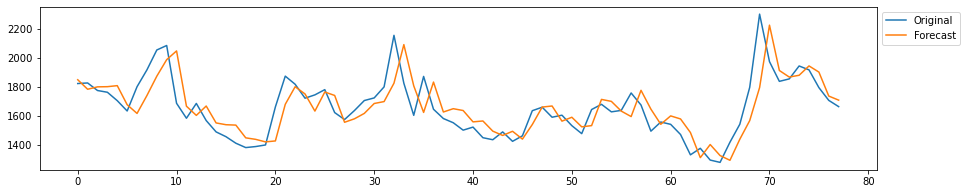

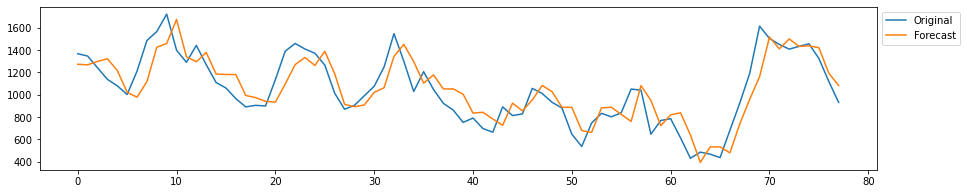

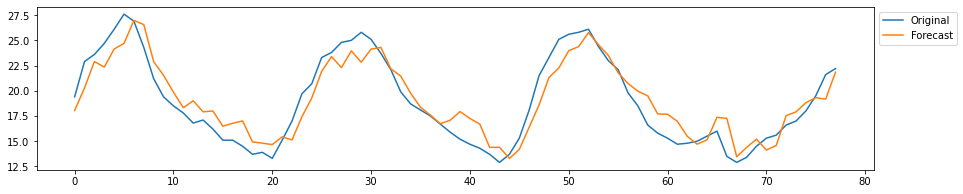

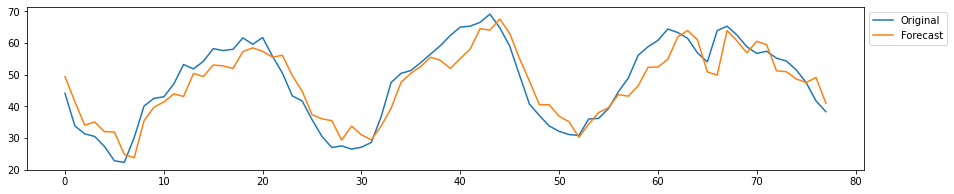

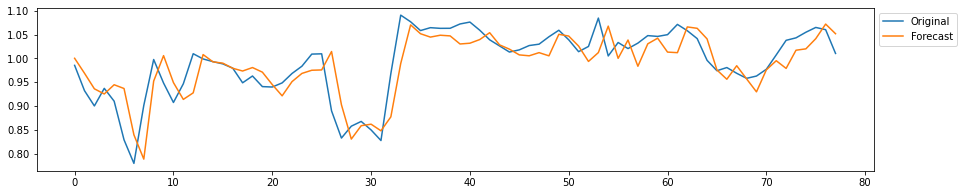

--------------------
training window 622


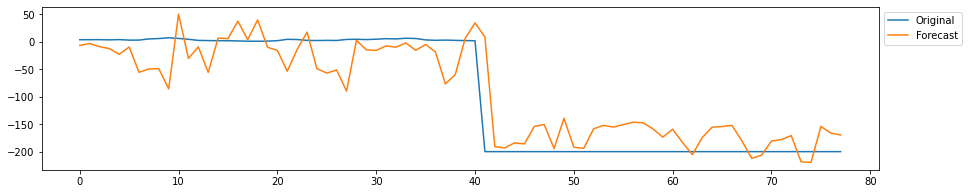

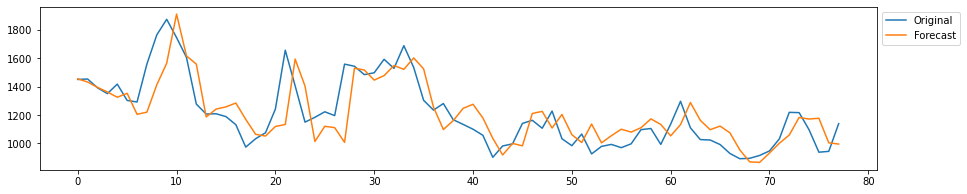

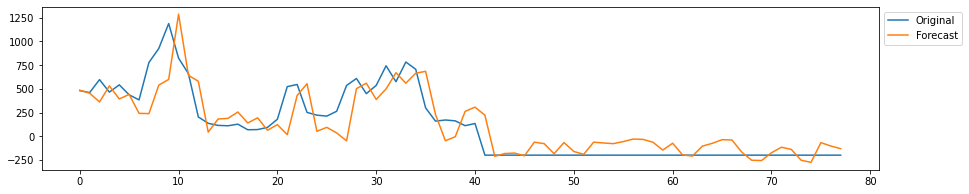

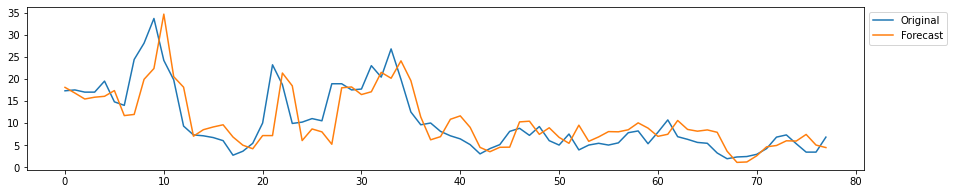

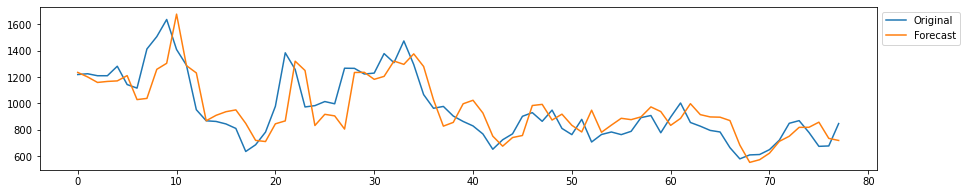

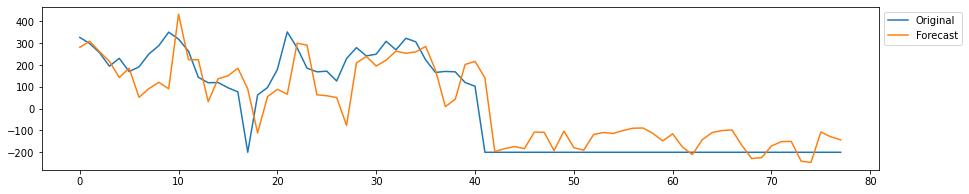

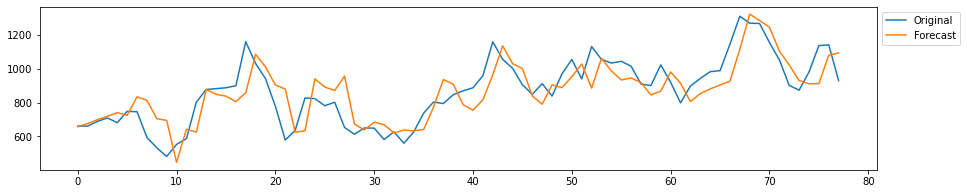

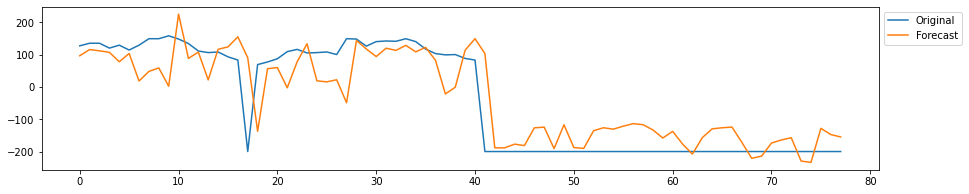

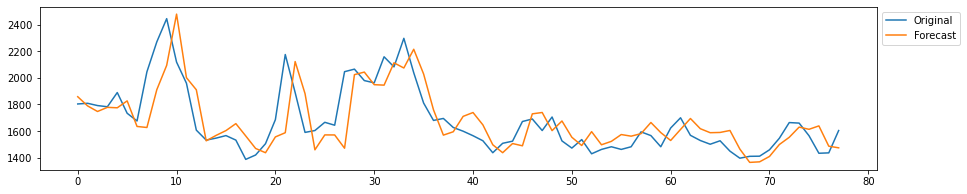

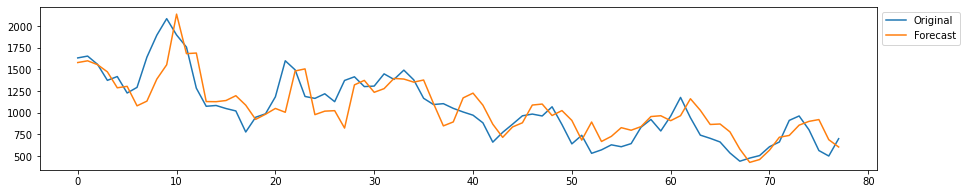

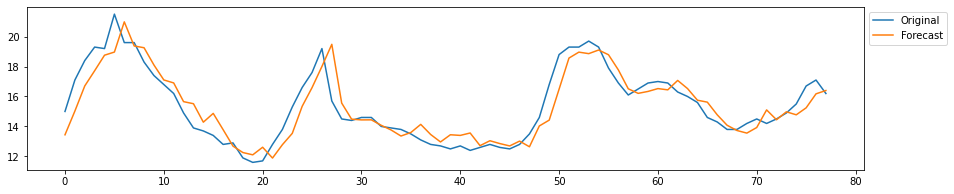

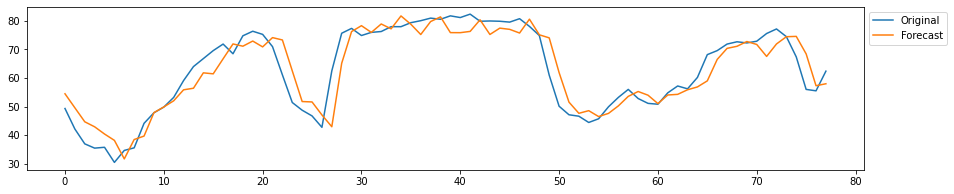

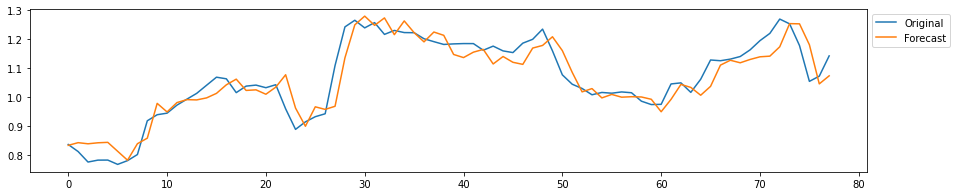

--------------------
training window 933


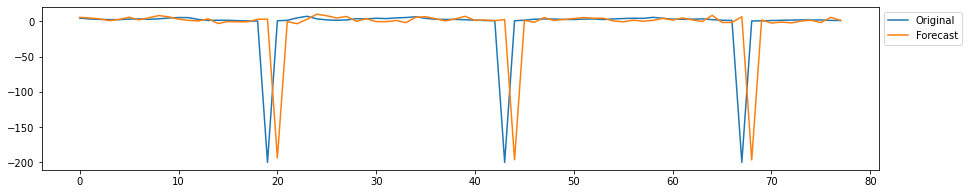

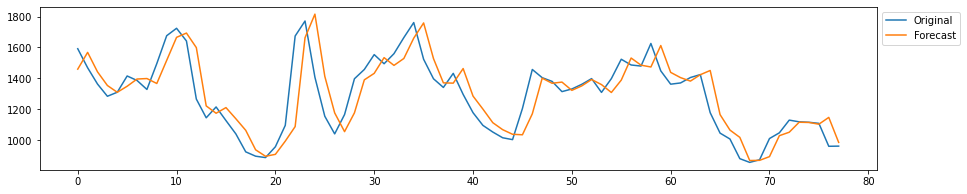

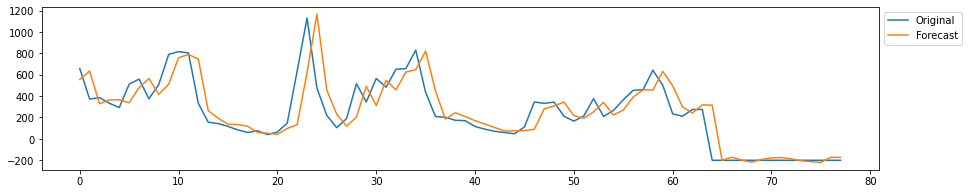

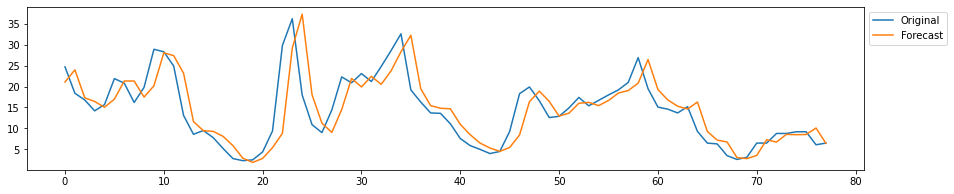

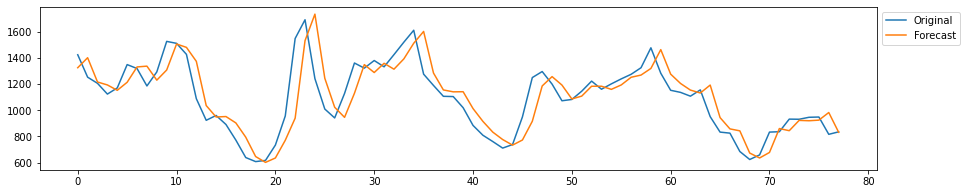

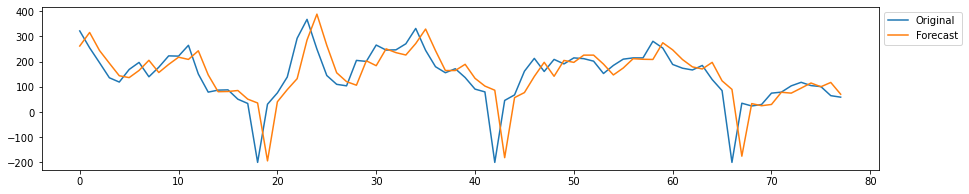

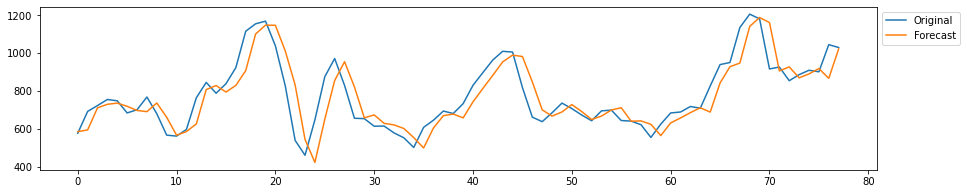

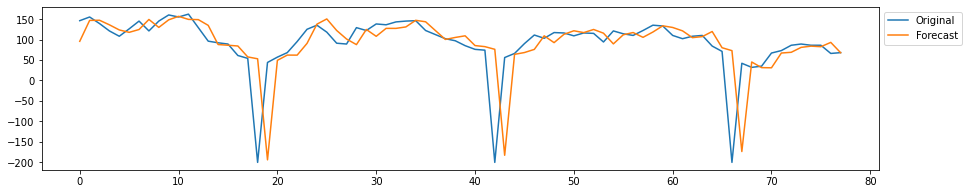

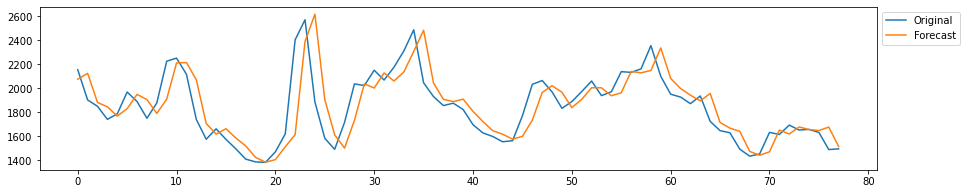

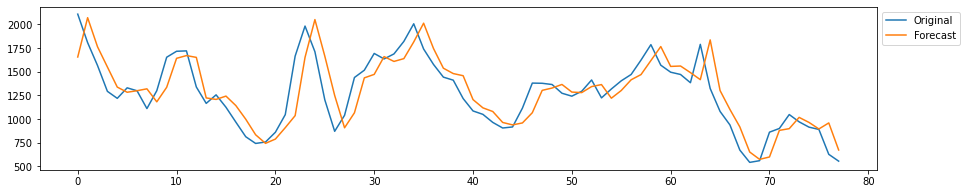

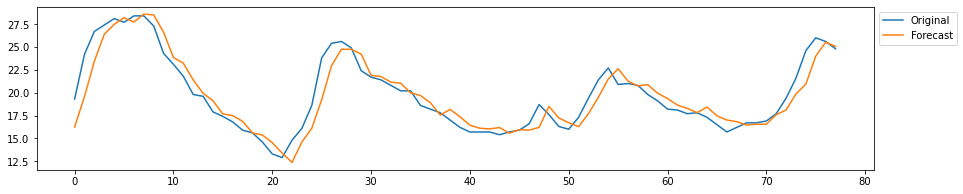

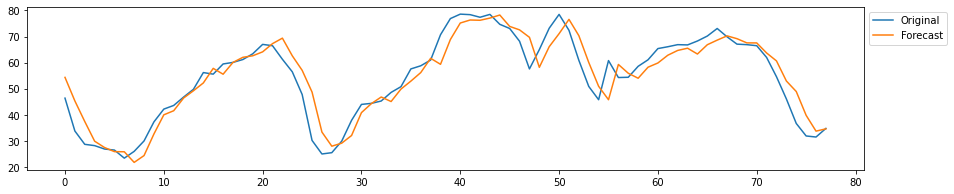

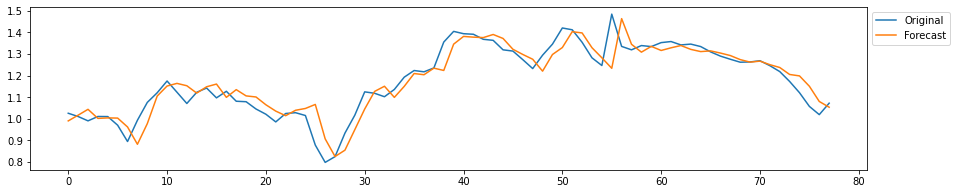

--------------------
training window 1244


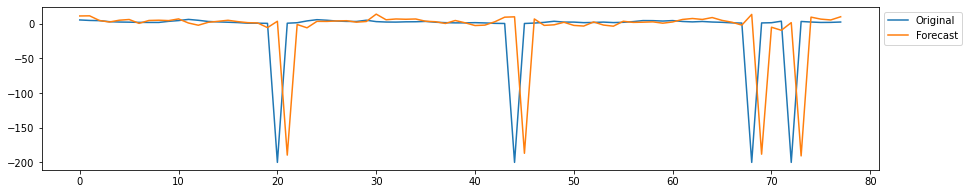

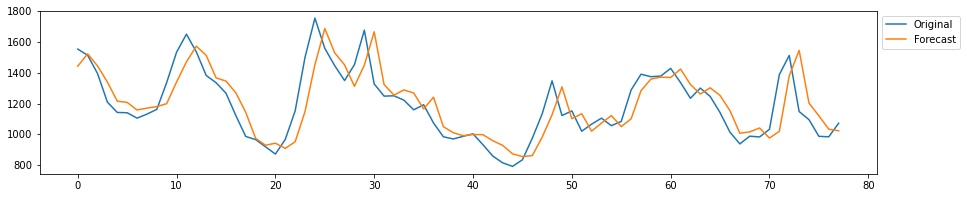

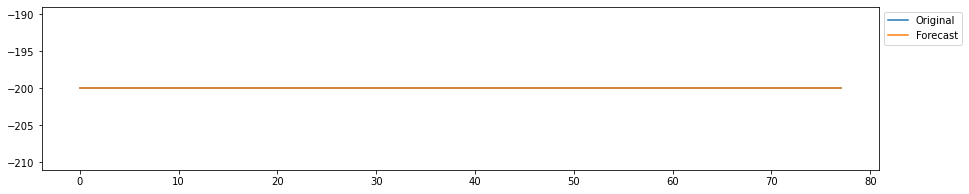

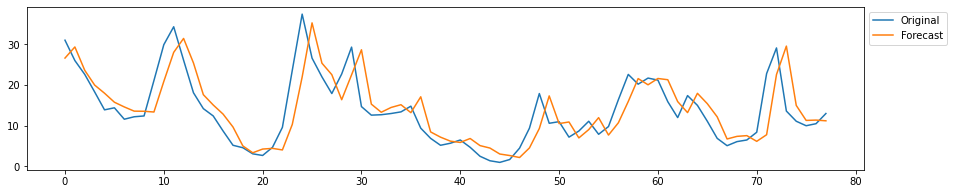

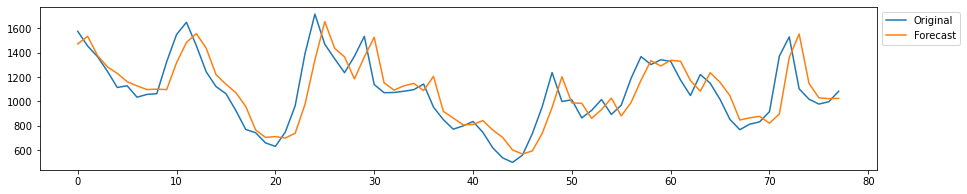

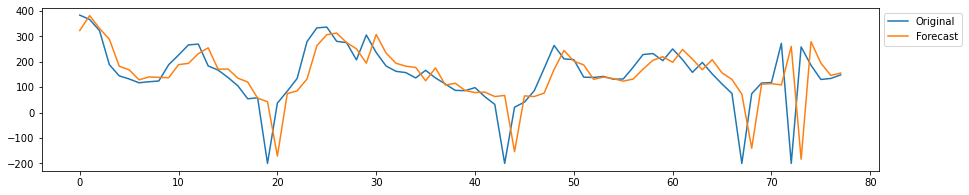

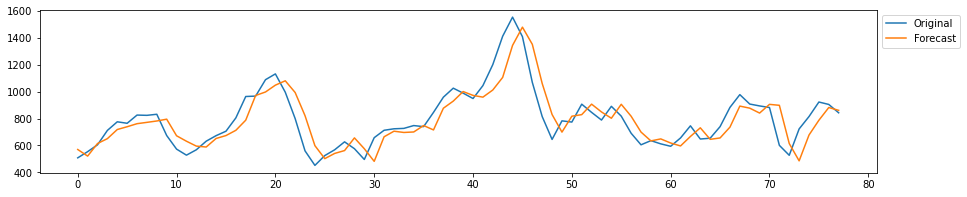

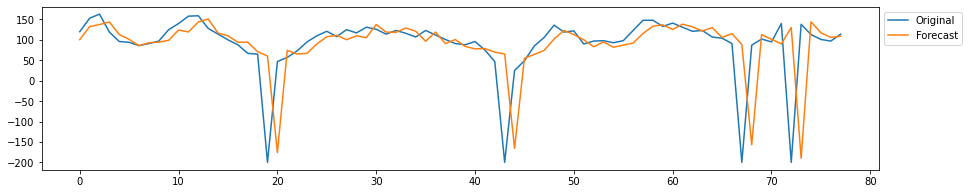

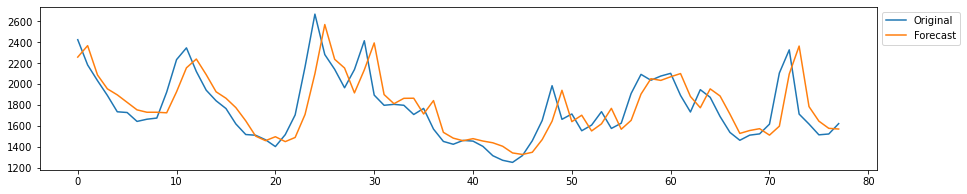

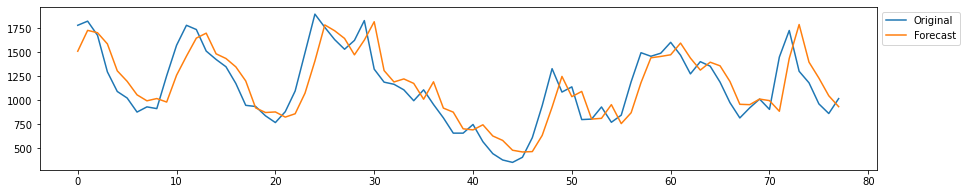

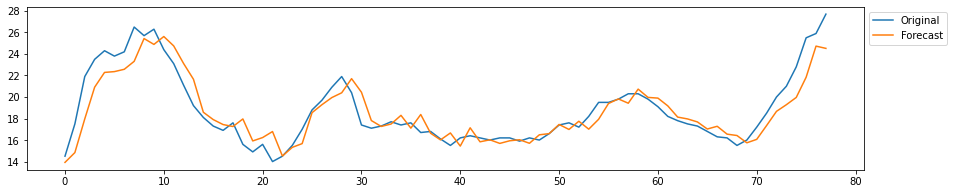

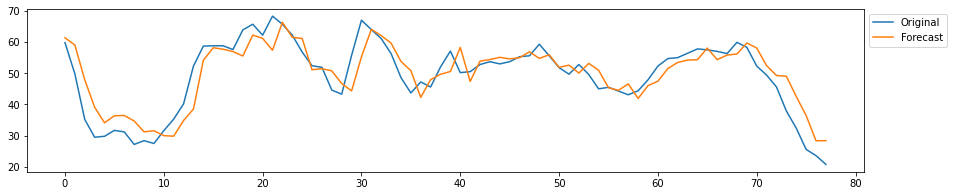

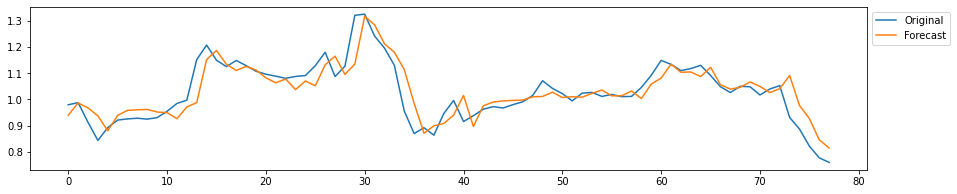

--------------------
training window 1555


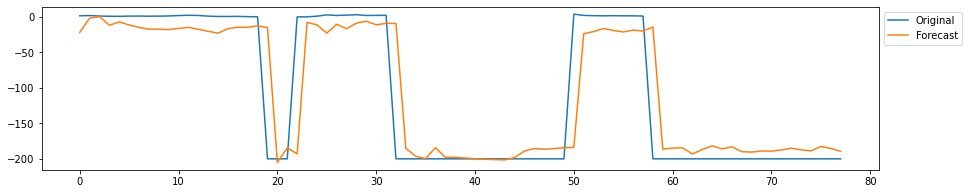

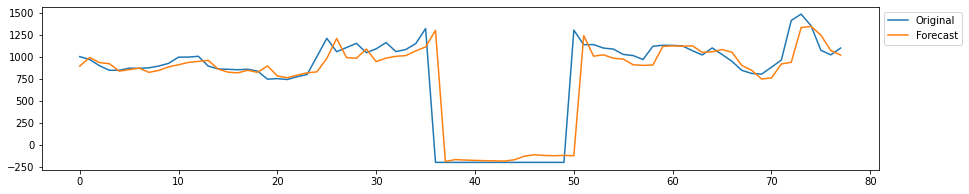

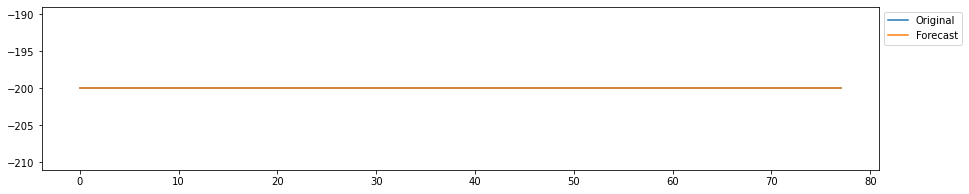

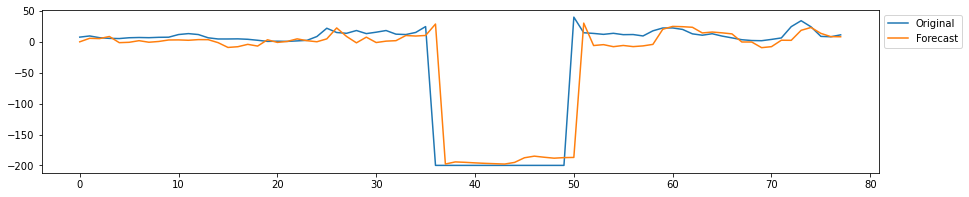

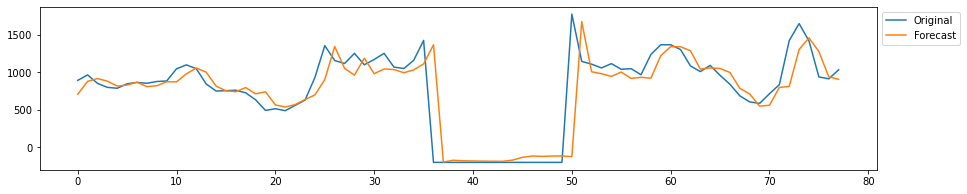

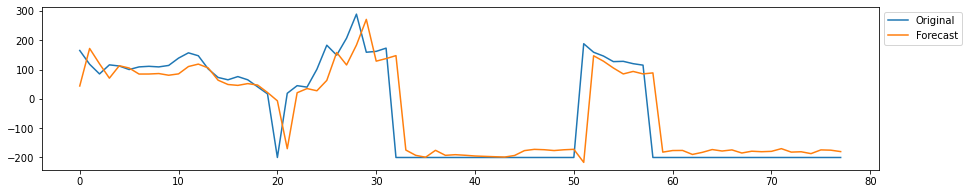

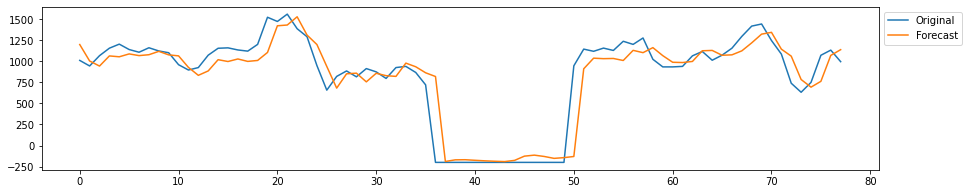

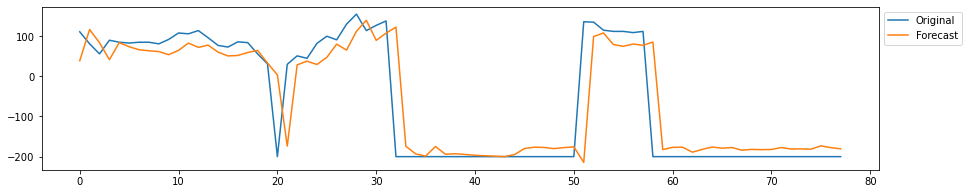

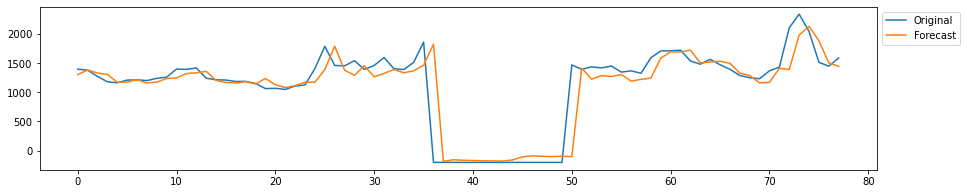

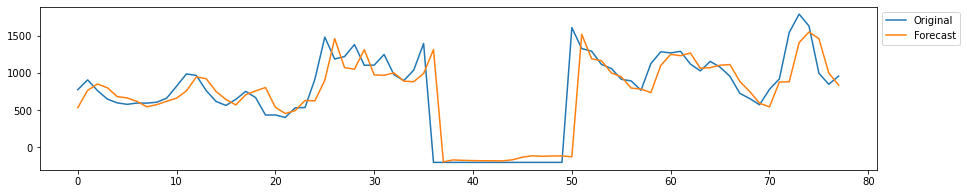

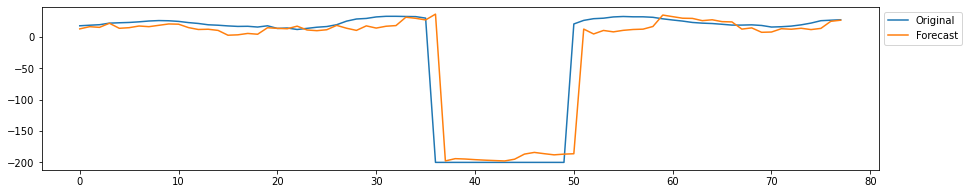

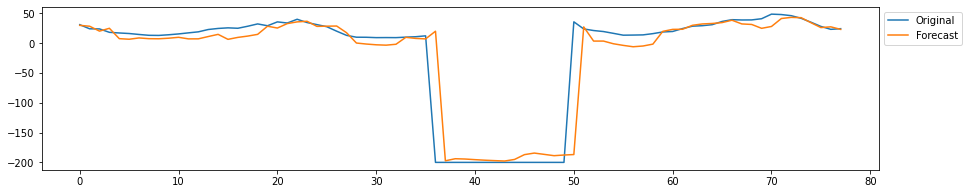

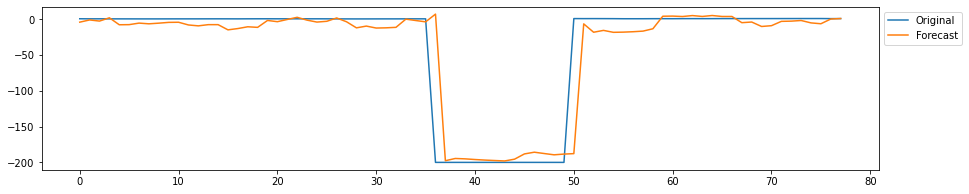

--------------------
training window 1866


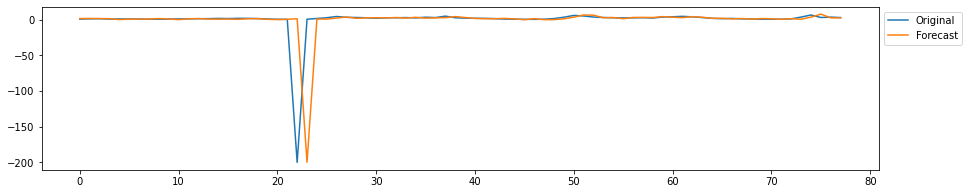

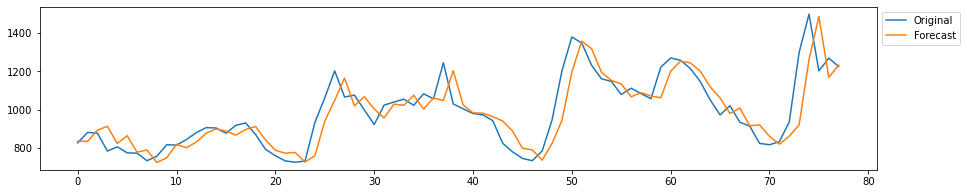

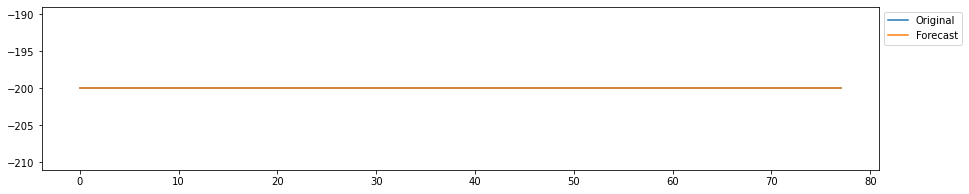

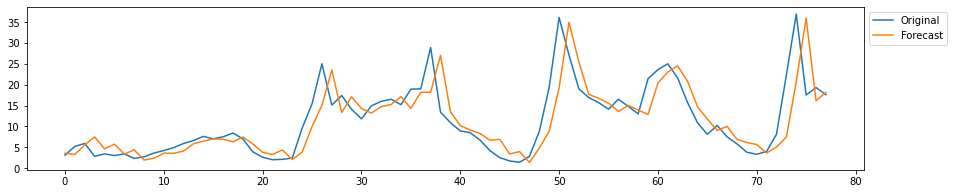

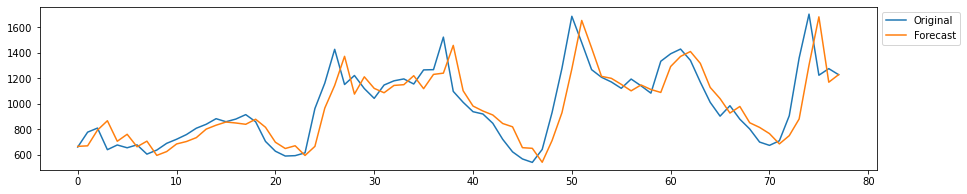

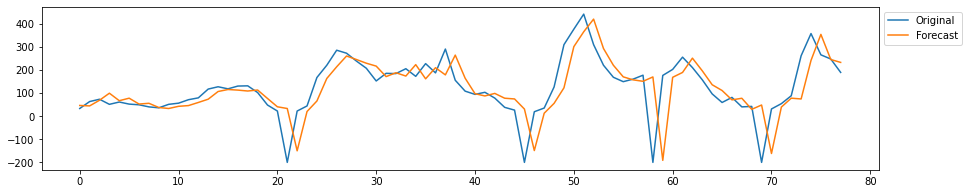

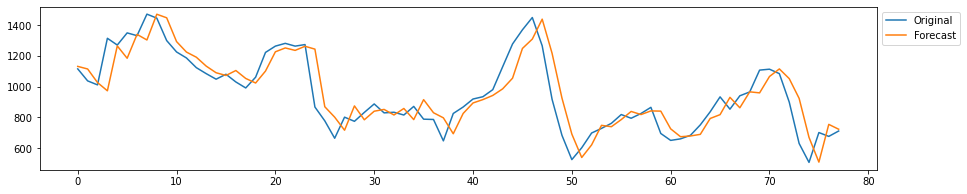

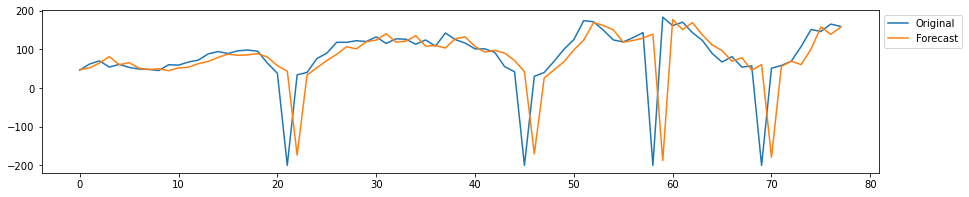

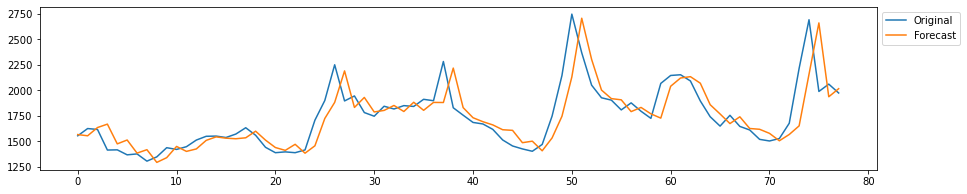

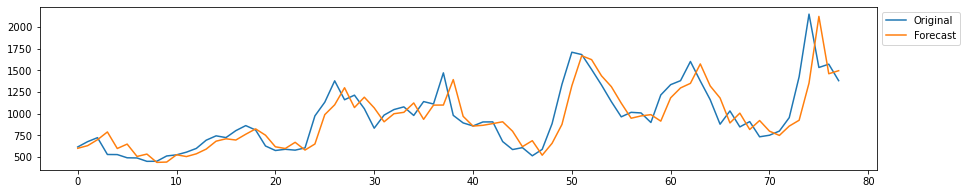

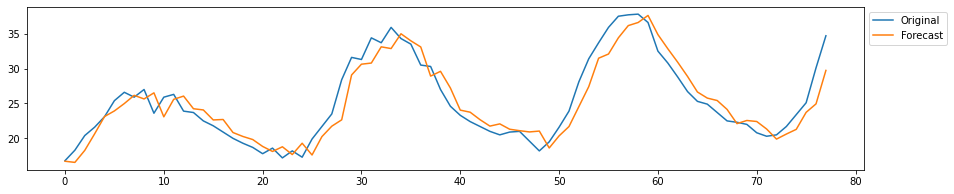

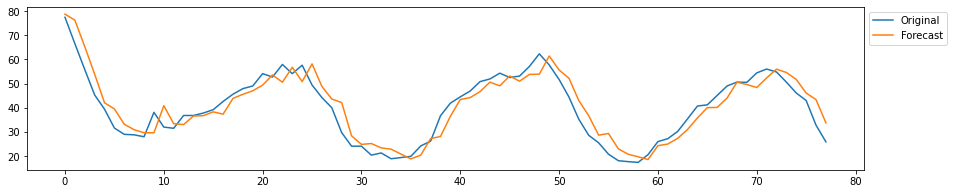

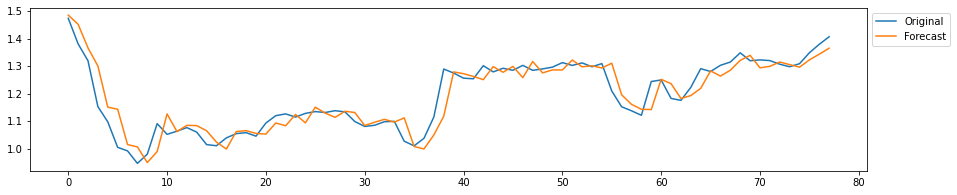

--------------------
training window 2177


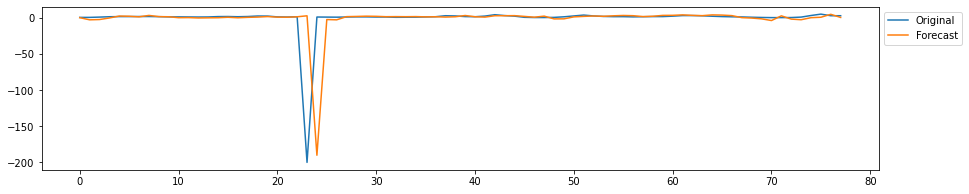

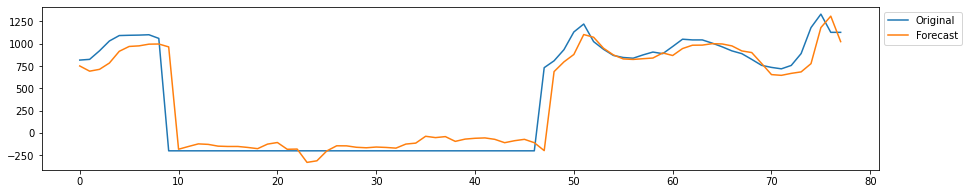

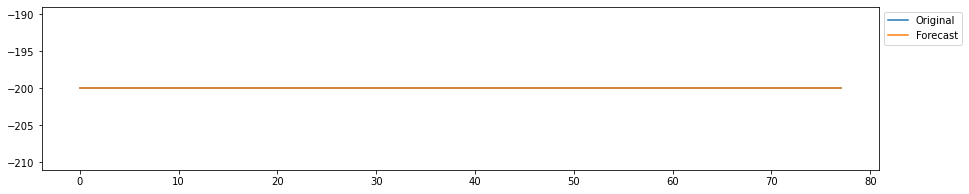

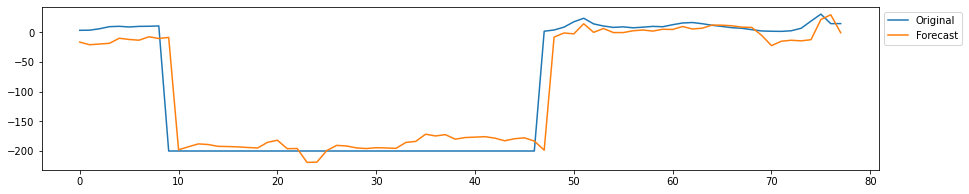

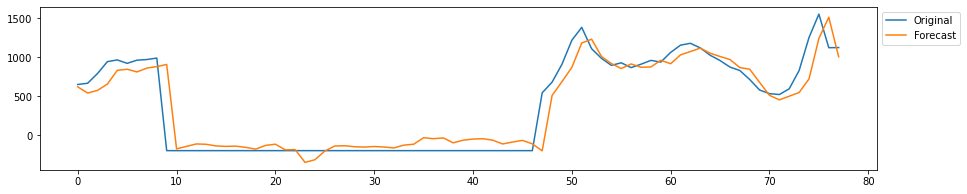

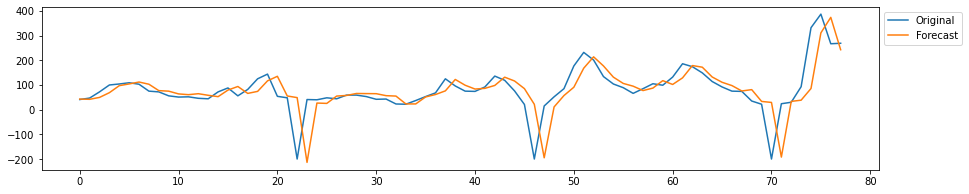

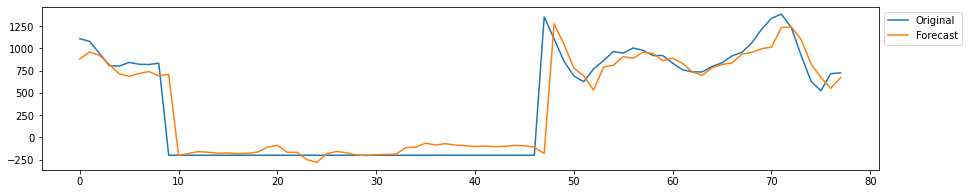

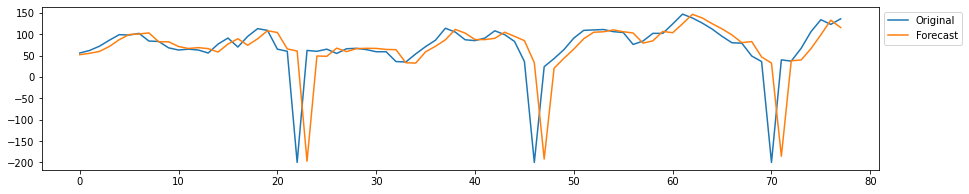

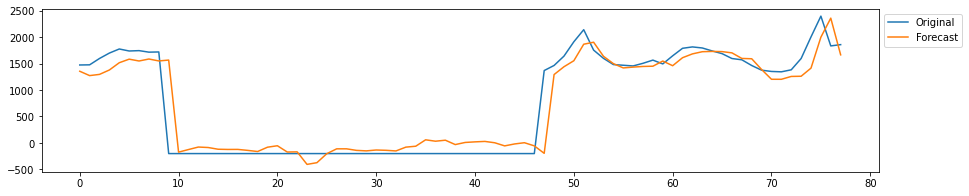

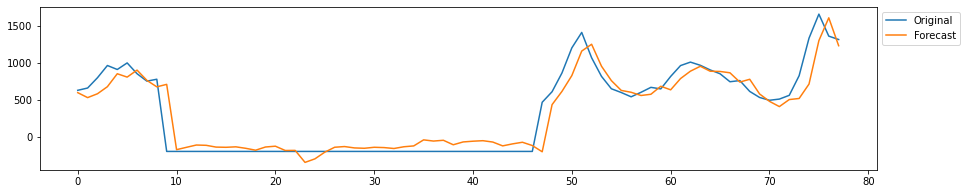

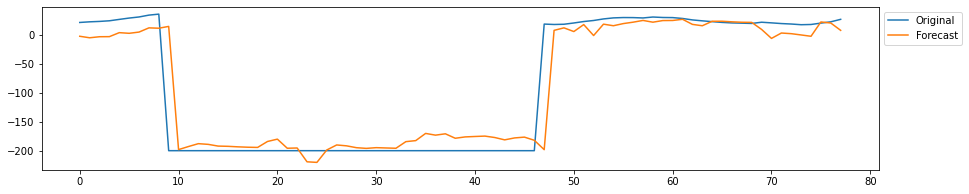

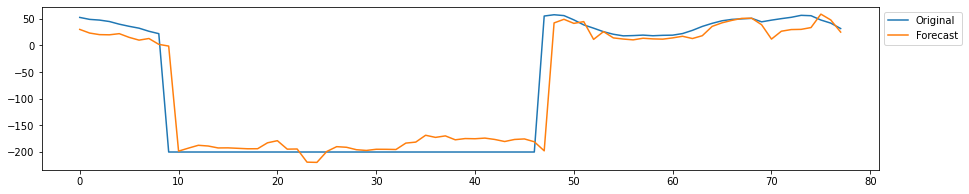

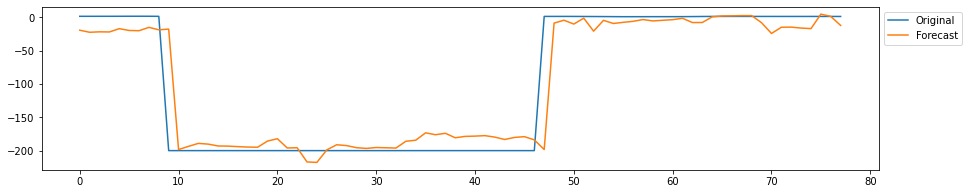

--------------------
training window 2488


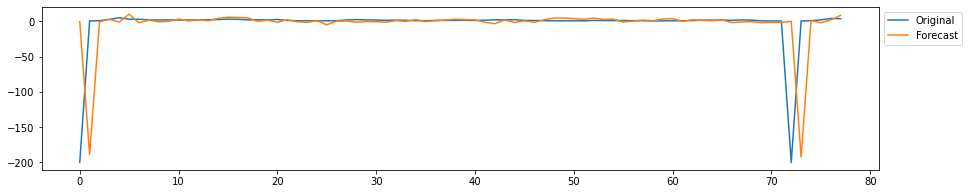

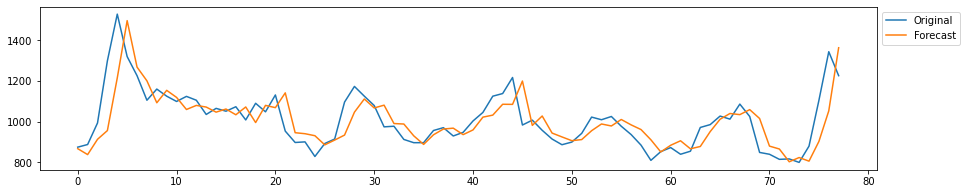

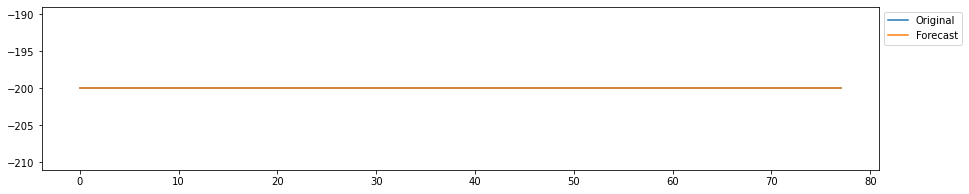

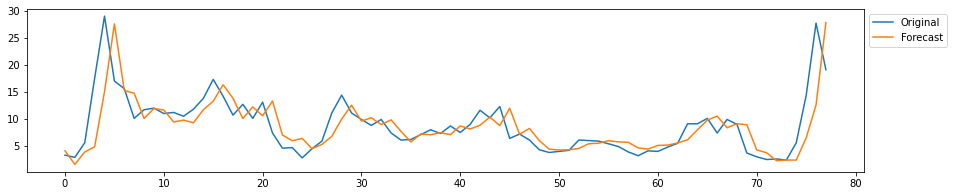

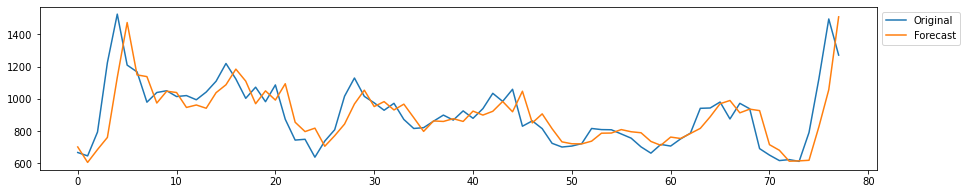

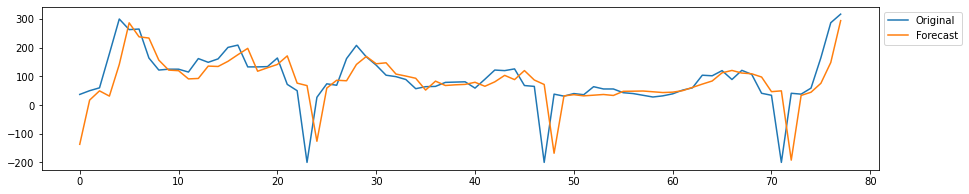

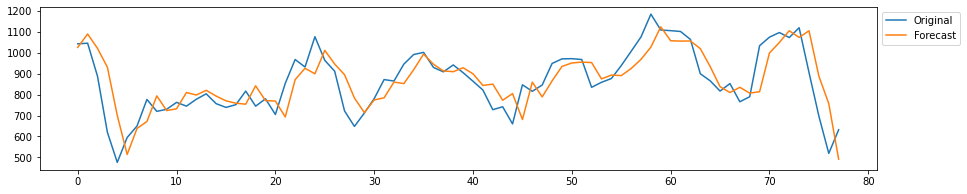

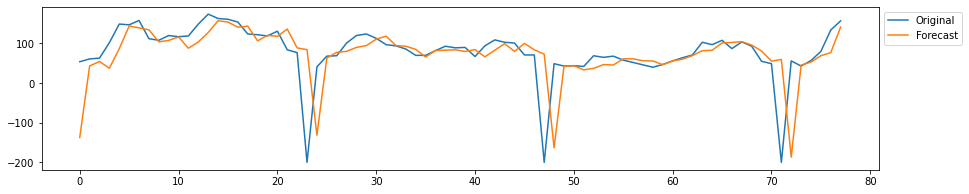

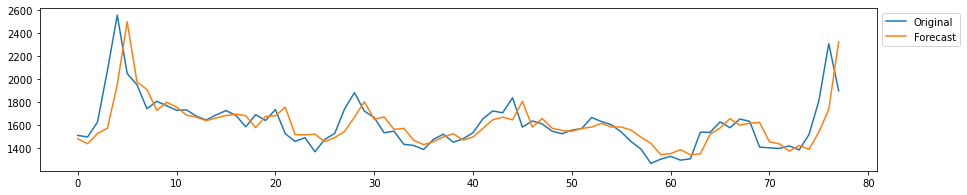

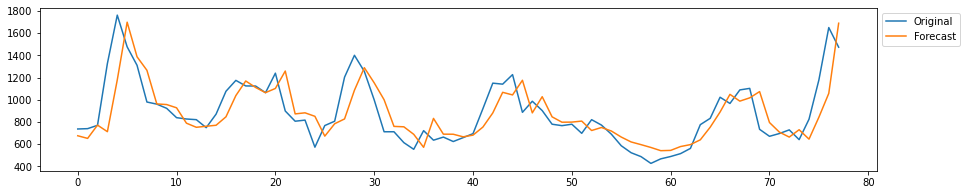

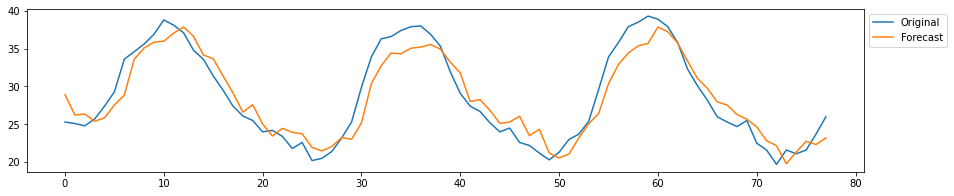

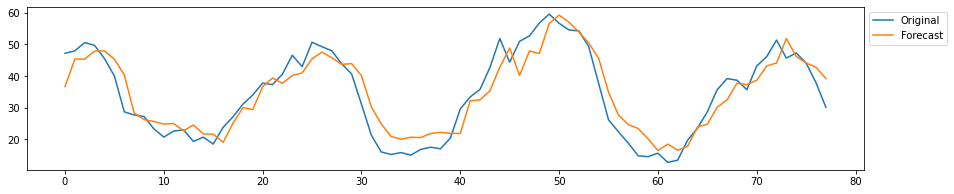

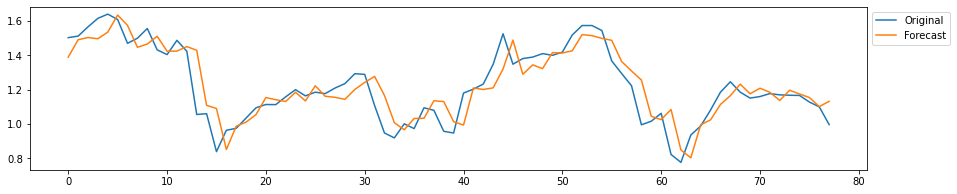

--------------------
training window 2799


In [ ]:
kpca_result =  sliding_window_pca(data=reframed,n_windows=30,train_size=0.75,steps_ahead=1,transformation='KPCA')

In [28]:
columns = list(df_forecats_columns)

final_result = {
    "variable": [],
    "rmse": [],
    "mae": [],
    "mape": [],
    "r2": []
}

measures = kpca_result
var = measures.groupby("variable")

for col in columns:
    
    var_agr = var.get_group(col)
           
    rmse = round(statistics.mean(var_agr.loc[:,'rmse']),3)
    mape = round(statistics.mean(var_agr.loc[:,'mape']),3)
    mae = round(statistics.mean(var_agr.loc[:,'mae']),3)
    r2 = round(statistics.mean(var_agr.loc[:,'r2']),3)

    final_result["variable"].append(col)
    final_result["rmse"].append(rmse)
    final_result["mape"].append(mape)
    final_result["mae"].append(mae)
    final_result["r2"].append(r2)
        
    #print(f'Results: {(col,rmse,mae,r2)}')
        
        
final_measures_kpca = pd.DataFrame(final_result) 



In [29]:
print("Statistics MIMO KPCA-NSFTS(test): ")
final_measures_kpca

Statistics MIMO KPCA-NSFTS(test): 


variable     rmse      mae     mape     r2
0          CO(GT)(t)   38.007   12.521  910.814 -0.317
1     PT08.S1(CO)(t)  127.674   80.253   10.057  0.585
2        NMHC(GT)(t)   21.422   14.052    5.500  0.961
3        C6H6(GT)(t)   10.957    4.885   60.911  0.487
4   PT08.S2(NMHC)(t)  154.119  103.971   13.653  0.614
5         NOx(GT)(t)  108.956   69.752   49.430  0.447
6    PT08.S3(NOx)(t)  121.897   85.580   12.758  0.678
7         NO2(GT)(t)   71.484   35.710   37.087  0.135
8    PT08.S4(NO2)(t)  171.918  106.502   10.977  0.541
9     PT08.S5(O3)(t)  189.112  134.350   16.961  0.651
10              T(t)    9.322    3.609   17.017  0.694
11             RH(t)   12.821    6.160   12.814  0.692
12             AH(t)    7.535    2.479  193.922  0.685

## Sliding Window: MIMO PCA-NSFTS

In [30]:
num_components_pca = 8
order_fts_model = 1
npart = 50
gamma = 0.1
fts_model = nsfts.NonStationaryFTS
memory_window_error = 24
steps_ahead = 1

mimo_kpca_nsfts = MimoNonStationaryFtsPca(num_components_pca, order_fts_model, npart,
                                            gamma, fts_model, memory_window_error)

In [31]:
pca_result =  sliding_window_pca(data=reframed,n_windows=30,train_size=0.75,steps_ahead=1,transformation='PCA')

--------------------
training window 0
--------------------
training window 311
--------------------
training window 622
--------------------
training window 933
--------------------
training window 1244
--------------------
training window 1555
--------------------
training window 1866
--------------------
training window 2177
--------------------
training window 2488
--------------------
training window 2799
--------------------
training window 3110
--------------------
training window 3421
--------------------
training window 3732
--------------------
training window 4043
--------------------
training window 4354
--------------------
training window 4665
--------------------
training window 4976
--------------------
training window 5287
--------------------
training window 5598
--------------------
training window 5909
--------------------
training window 6220
--------------------
training window 6531
--------------------
training window 6842
--------------------
training window 715

In [32]:
columns = list(df_forecats_columns)

final_result = {
    "variable": [],
    "rmse": [],
    "mae": [],
    "mape": [],
    "r2": []
}

measures = pca_result
var = measures.groupby("variable")

for col in columns:
    
    var_agr = var.get_group(col)
           
    rmse = round(statistics.mean(var_agr.loc[:,'rmse']),3)
    mape = round(statistics.mean(var_agr.loc[:,'mape']),3)
    mae = round(statistics.mean(var_agr.loc[:,'mae']),3)
    r2 = round(statistics.mean(var_agr.loc[:,'r2']),3)

    final_result["variable"].append(col)
    final_result["rmse"].append(rmse)
    final_result["mape"].append(mape)
    final_result["mae"].append(mae)
    final_result["r2"].append(r2)
        
    #print(f'Results: {(col,rmse,mae,r2)}')
        
        
final_measures_pca = pd.DataFrame(final_result) 

print("Statistics MIMO PCA-NSFTS(test): ")
final_measures_pca

Statistics MIMO PCA-NSFTS(test): 


variable     rmse      mae      mape     r2
0          CO(GT)(t)   39.608   19.040  1202.699 -0.254
1     PT08.S1(CO)(t)  135.398   88.115    11.867  0.533
2        NMHC(GT)(t)   19.662   13.755     6.256  0.966
3        C6H6(GT)(t)   11.675    5.662    64.756  0.450
4   PT08.S2(NMHC)(t)  162.642  112.385    15.850  0.569
5         NOx(GT)(t)  111.959   76.365    52.640  0.429
6    PT08.S3(NOx)(t)  135.393   98.966    16.411  0.633
7         NO2(GT)(t)   70.458   40.949    40.307  0.186
8    PT08.S4(NO2)(t)  182.039  117.530    13.207  0.486
9     PT08.S5(O3)(t)  201.380  146.586    20.105  0.605
10              T(t)   10.555    4.879    20.255  0.557
11             RH(t)   14.964    7.910    16.685  0.563
12             AH(t)    8.277    3.318   209.415  0.577